In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('covid_countries.csv')

In [4]:
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0
...,...,...,...,...,...
91387,2021-05-07,Zimbabwe,38403,36041,1576
91388,2021-05-08,Zimbabwe,38414,36052,1576
91389,2021-05-09,Zimbabwe,38419,36063,1576
91390,2021-05-10,Zimbabwe,38433,36208,1576


In [5]:
df.describe()

,Confirmed,Recovered,Deaths
count,9.139200e+04,9.139200e+04,91392.000000
mean,2.546453e+05,1.489122e+05,6152.198343
std,1.451993e+06,7.571858e+05,29501.187888
min,0.000000e+00,0.000000e+00,0.000000
25%,2.120000e+02,4.500000e+01,2.000000
50%,5.691000e+03,2.953000e+03,96.000000
75%,7.691475e+04,4.443550e+04,1361.250000
max,3.277837e+07,1.902730e+07,582834.000000


In [17]:
data_frame = df[df["Country"]=="India"]
x = data_frame.iloc[:,:-1].values
y = data_frame.iloc[:,-1].values

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(x[:, 2:4])
x[:, 2:4] = imputer.transform(x[:, 2:4])

In [25]:
x = np.delete(x, 1, 1)
x

array([['2020-01-22', 0.0, 0.0],
       ['2020-01-23', 0.0, 0.0],
       ['2020-01-24', 0.0, 0.0],
       ...,
       ['2021-05-09', 22662575.0, 18671222.0],
       ['2021-05-10', 22992517.0, 19027304.0],
       ['2021-05-11', 22992517.0, 19027304.0]], dtype=object)

In [29]:
data_frame.drop(["Country"], axis = 1)
data_frame

,Date,Country,Confirmed,Recovered,Deaths
37604,2020-01-22,India,0,0,0
37605,2020-01-23,India,0,0,0
37606,2020-01-24,India,0,0,0
37607,2020-01-25,India,0,0,0
37608,2020-01-26,India,0,0,0
...,...,...,...,...,...
38075,2021-05-07,India,21892676,17930960,238270
38076,2021-05-08,India,22296081,18317364,242347
38077,2021-05-09,India,22662575,18671222,246116
38078,2021-05-10,India,22992517,19027304,249992


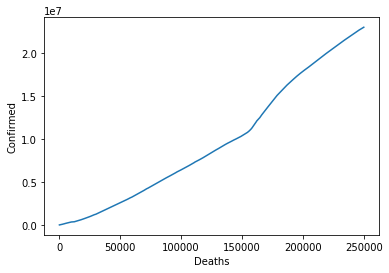

In [37]:
import seaborn as sns
#sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
#fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="Deaths", y="Confirmed",data=data_frame)